In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
import graphviz 
import pandas as pd
import requests
from sklearn.tree import export_graphviz

def plot_tree(model, X, y):
    """
    This function was taken from Lecture #9, it graphs the decision classifier in the form of a tree.
    """
    dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=y.unique(),filled=True, rounded=True,special_characters=True) 
    return graphviz.Source(dot_data)

In [20]:
df = pd.read_csv('Data.csv')
del df['Unnamed: 0']
del df['school']
del df['Walc']
del df['Dalc']
df['Harmful_Consumption'] = df['Harmful_Consumption'].map({1: 'yes', 0: 'no'})
family_data = df[['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'famsup', 'famrel', 'Harmful_Consumption']]
school_data = df[['traveltime', 'studytime', 'failures','absences', 'schoolsup', 'freetime', 'G1', 'G2', 'G3', 'Harmful_Consumption']]


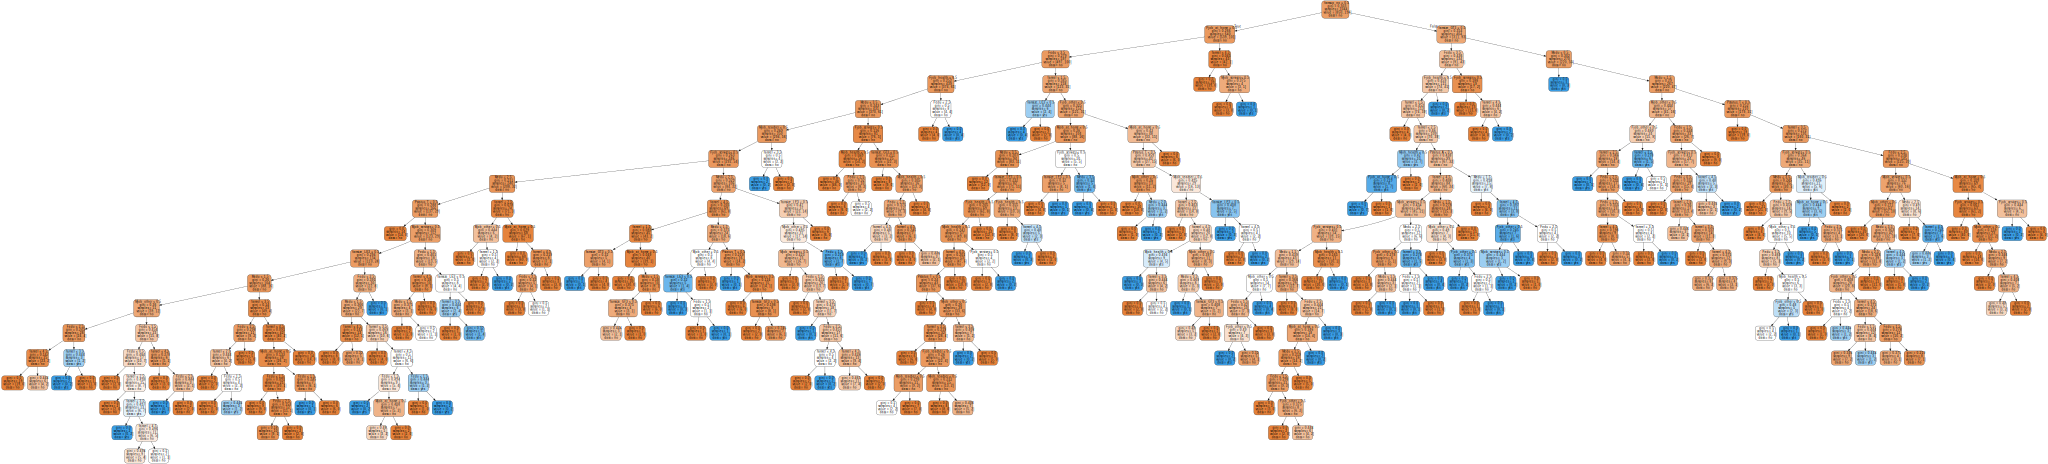

In [29]:
#model based on family data includes constants such as age, sex & health
fam_x = family_data.loc[:, family_data.columns != 'Harmful_Consumption']
fam_x = pd.get_dummies(fam_x)
fam_y = df['Harmful_Consumption']
family_model = DecisionTreeClassifier()
family_model.fit(fam_x,fam_y)
plot_tree(family_model, fam_x, fam_y)

In [28]:
famX_train, famX_test, famy_train, famy_test = train_test_split(fam_x, fam_y, test_size=0.2)
family_model.fit(famX_train, famy_train)
#accuracy at predicting alcoholic student based off of family characteristics
fam_acc_score = accuracy_score(famy_test, family_model.predict(famX_test))
print('There is', round(fam_acc_score *100), "percent accuracy when predicting if a student will harmfully consume alcohol based off family related features.")

There is 83.0 percent accuracy when predicting if a student will harmfully consume alcohol based off family related features.


# -----------------------------------------------------------------------------------------------------

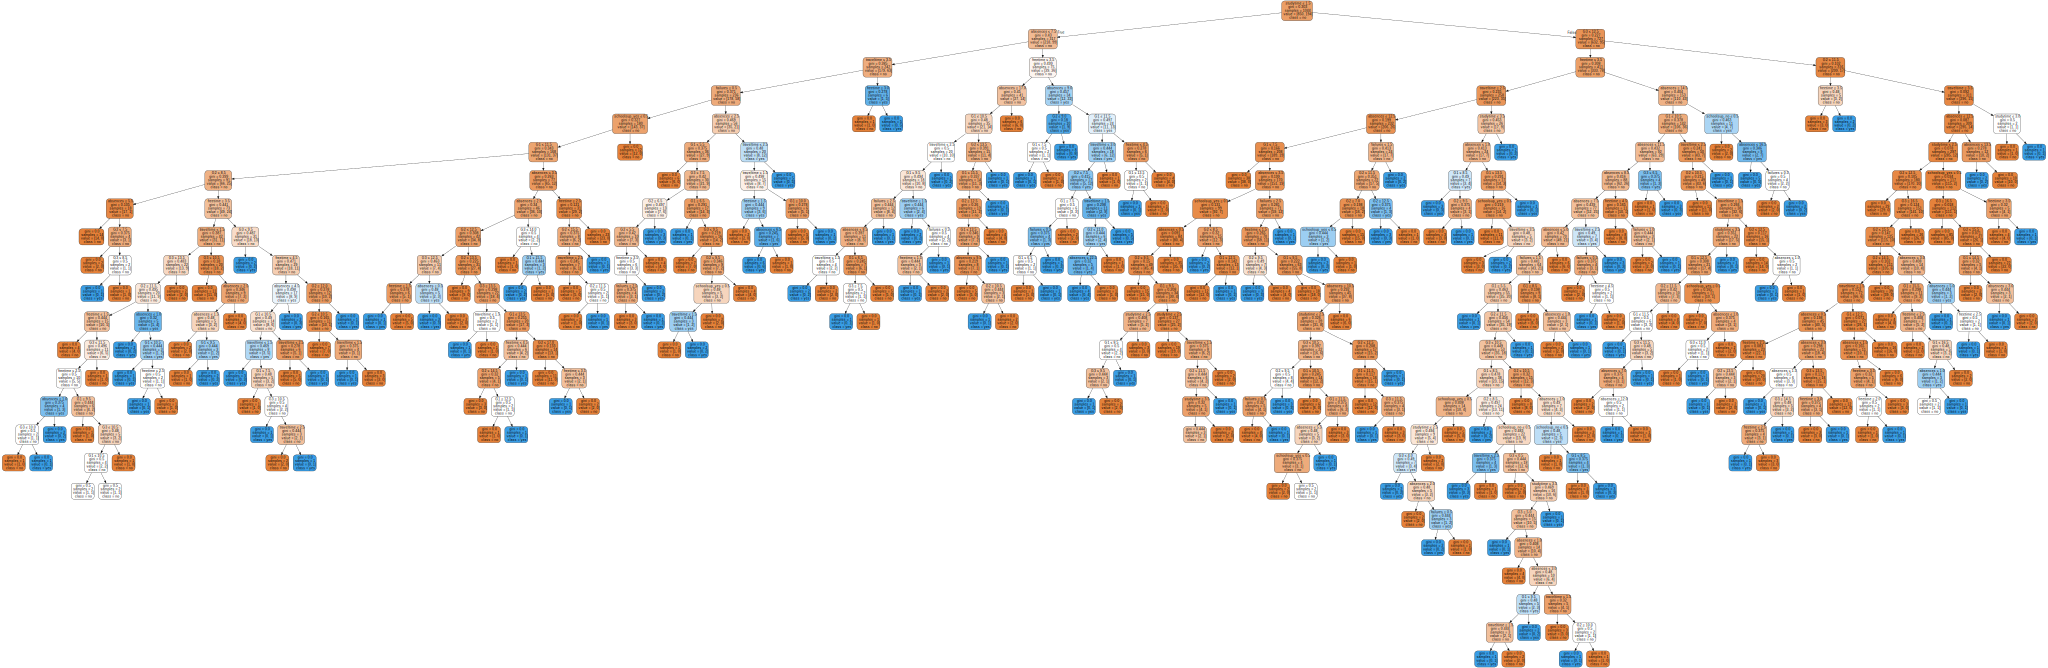

In [23]:
#model based on school data includes constants such as age, sex & health
school_x = school_data.loc[:, school_data.columns != 'Harmful_Consumption']
school_x = pd.get_dummies(school_x)
school_y = df['Harmful_Consumption']
school_model = DecisionTreeClassifier()
school_model.fit(school_x,school_y)
plot_tree(school_model, school_x, school_y)

In [27]:
schoolX_train, schoolX_test, schooly_train, schoooly_test = train_test_split(school_x, school_y, test_size=0.2)
school_model.fit(schoolX_train, schooly_train)

#accuracy at predicting alcoholic student based off of family characteristics
school_acc_score = accuracy_score(famy_test, family_model.predict(famX_test))
print('There is', round(school_acc_score *100), "percent accuracy when predicting if a student will harmfully consume alcohol based off school related features.")

There is 88.0 percent accuracy when predicting if a student will harmfully consume alcohol based off school related features.


# ----------------------------------------KNN STUFF-------------------------------------------------

In [25]:
knn_data = df[['studytime', 'paid', 'activities', 'romantic', 'famrel', 'goout']]

for col_name in knn_data.columns:
    if(knn_data[col_name].dtype == 'object'):
        knn_data[col_name]= knn_data[col_name].astype('category')
        knn_data[col_name] = knn_data[col_name].cat.codes

C:\Users\natna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\natna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
def knn_and_plot(feature_1, feature_2):
    """
    This function runs the data through a KNN classifier as well as graphs the results.
    """
    y = 1*(df.Harmful_Consumption == "no") + 2*(df.Harmful_Consumption == "yes")
    x = knn_data[[feature_1, feature_2]].values
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    m = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
    m.fit(x_train,y_train)
    
    y_pred = m.predict(x_test)
    accuracy = round(accuracy_score(y_test, y_pred),3) *100
    accuracy_statement = "There is {} percent accuracy when using a K-NN classifier with features ({}, {}) and a K value of 4.".format(accuracy, feature_1, feature_2)
    
    range1 = np.linspace(x[:,0].min(), x[:,0].max(), 100)
    range2 = np.linspace(x[:,1].min(), x[:,1].max(), 100)
    (xx1, xx2) = np.meshgrid(range1, range2)
    Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
    yhat = m.predict(Xgrid)
    plt.figure(figsize=(10,10))

    plt.imshow(yhat.reshape((100,100)),
    alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
    origin='lower', aspect='auto')

    plot = plt.scatter(x[:,0], x[:,1], c=y, s=100, alpha=0.5, edgecolor="k")
    plt.title(accuracy_statement)
    
    return plot 
    

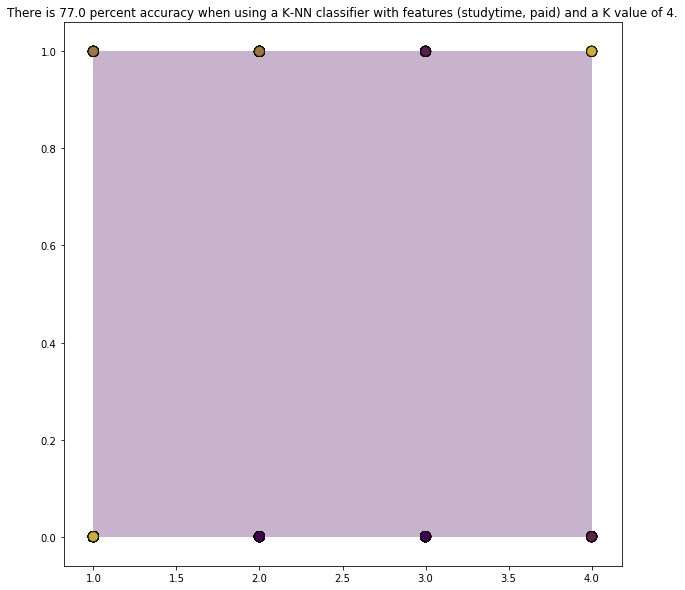

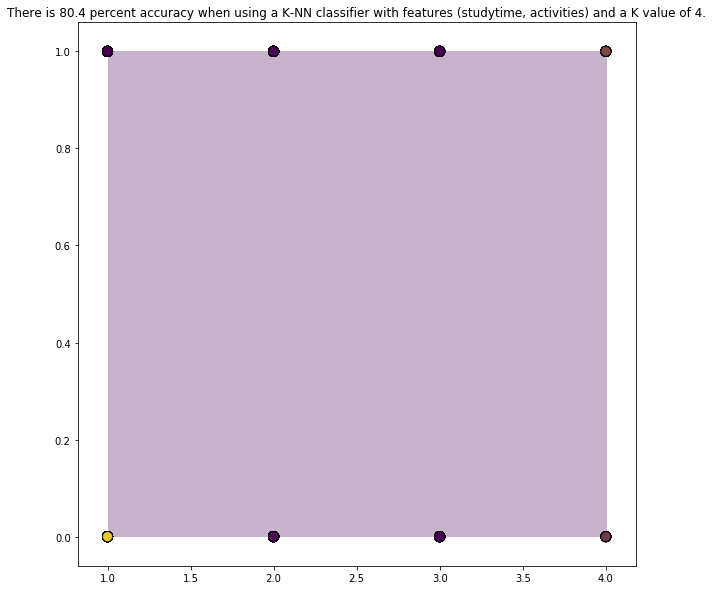

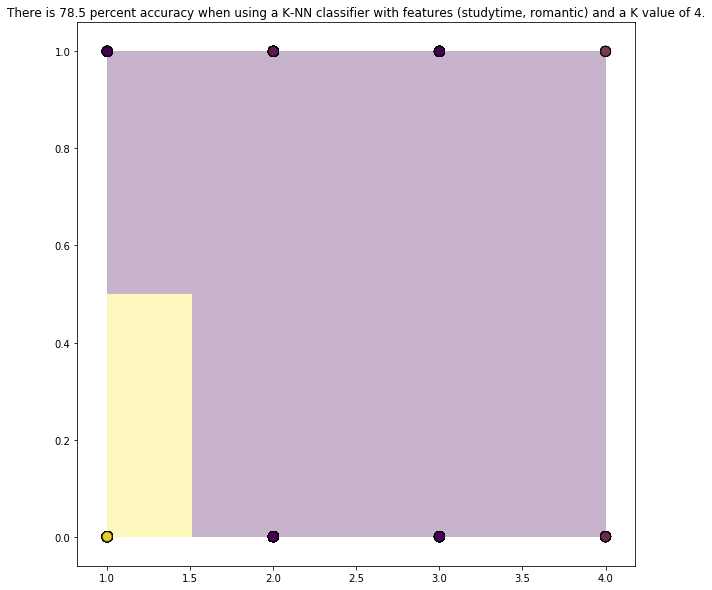

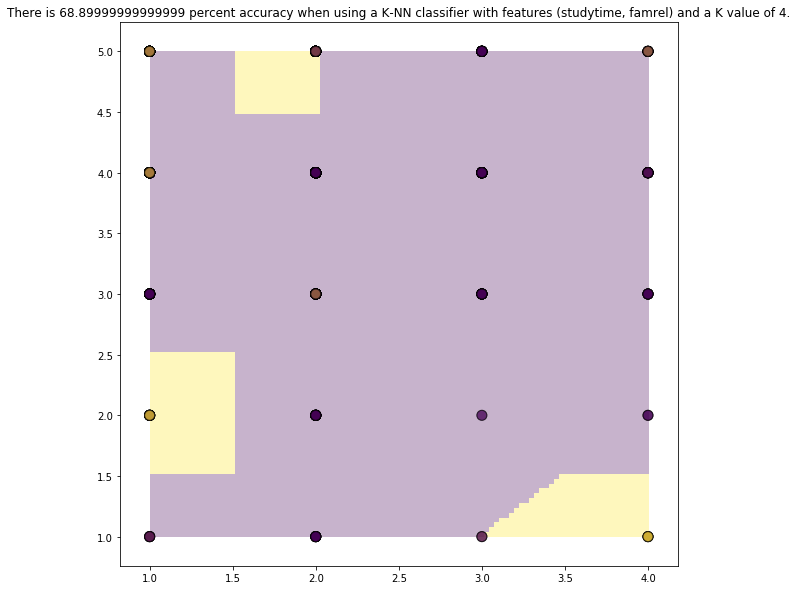

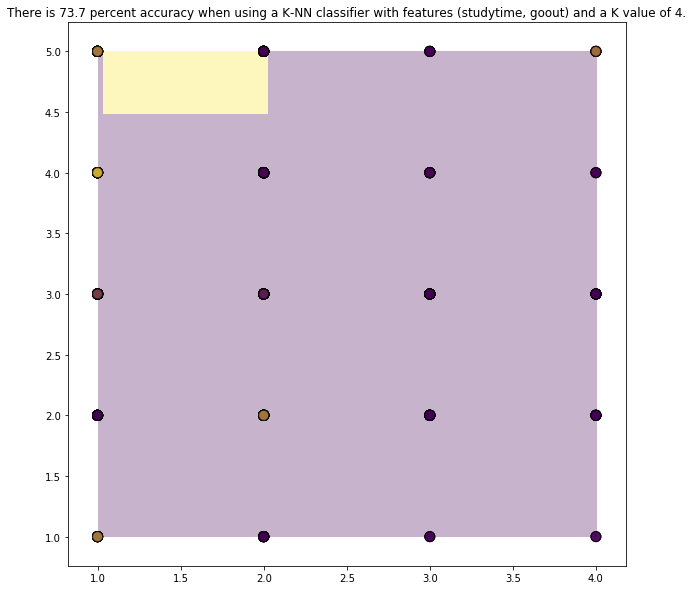

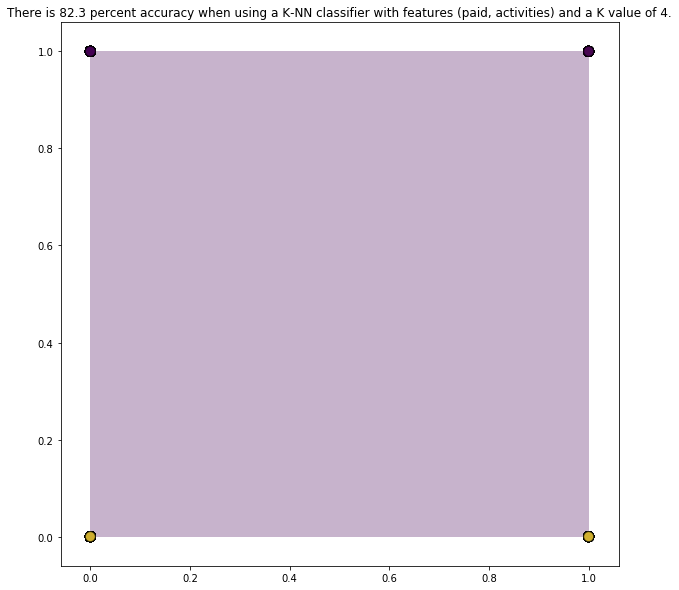

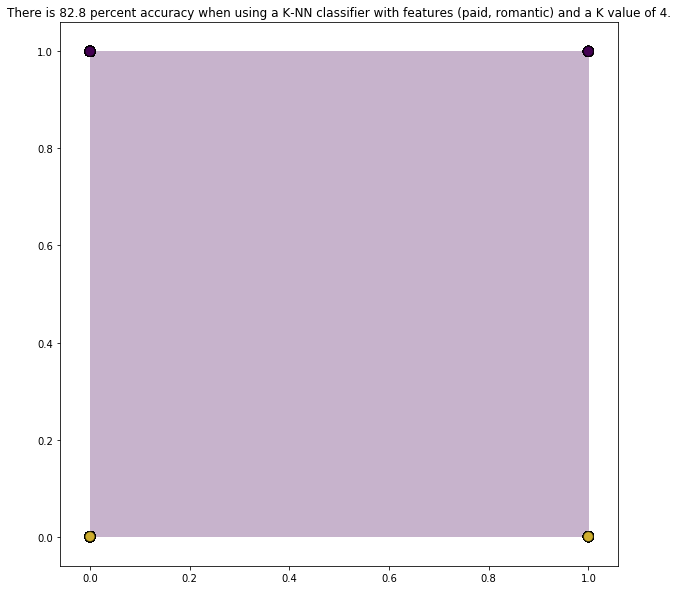

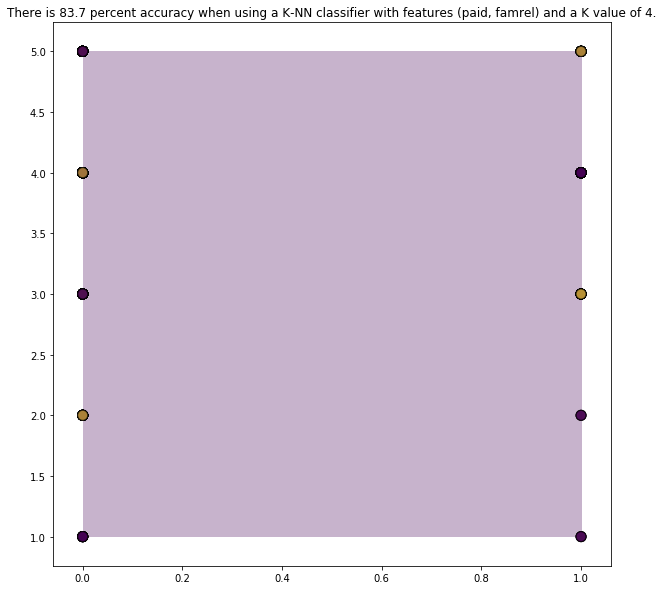

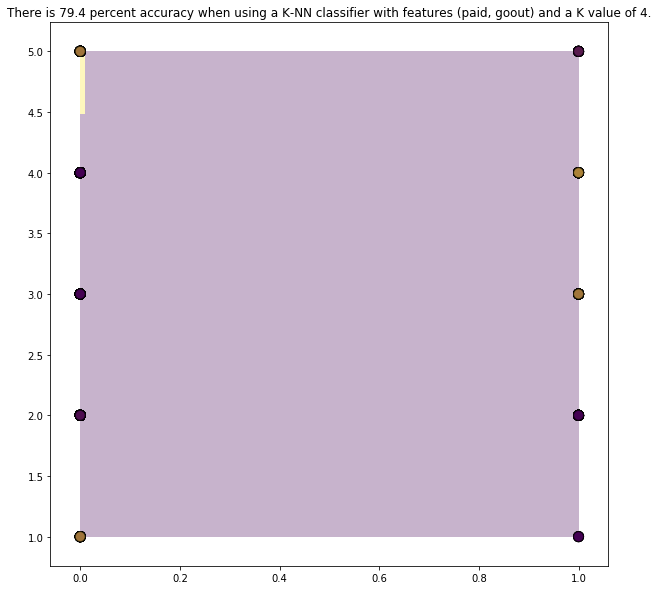

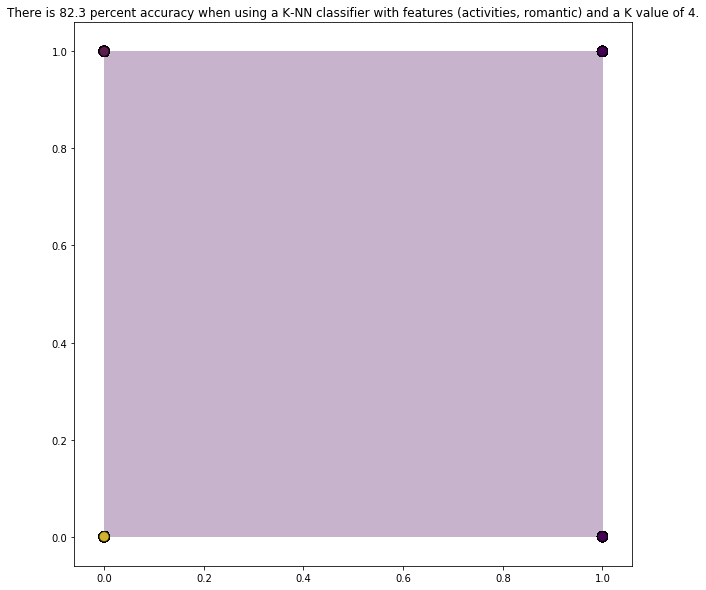

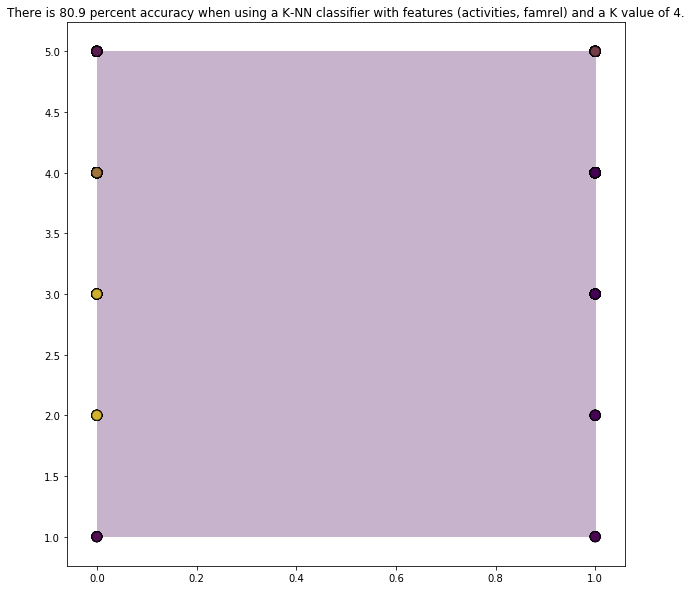

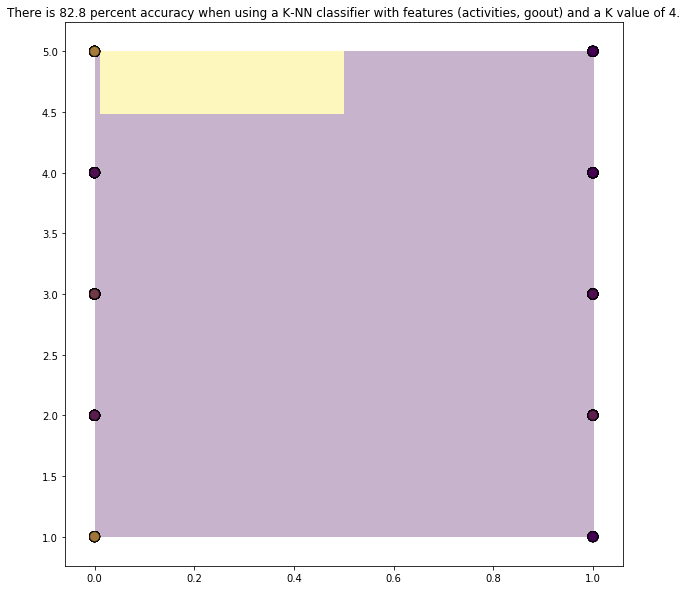

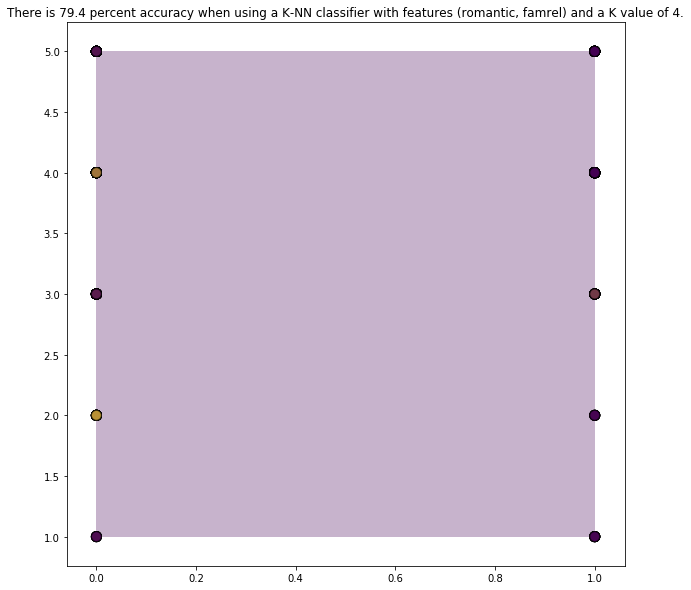

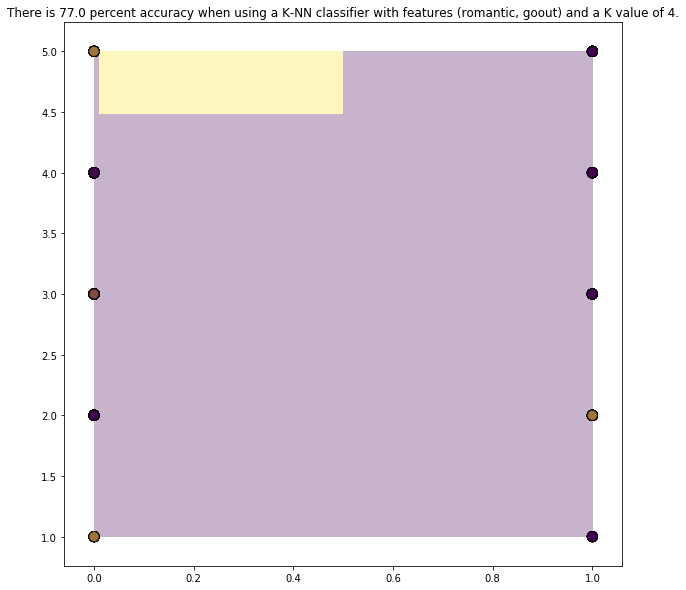

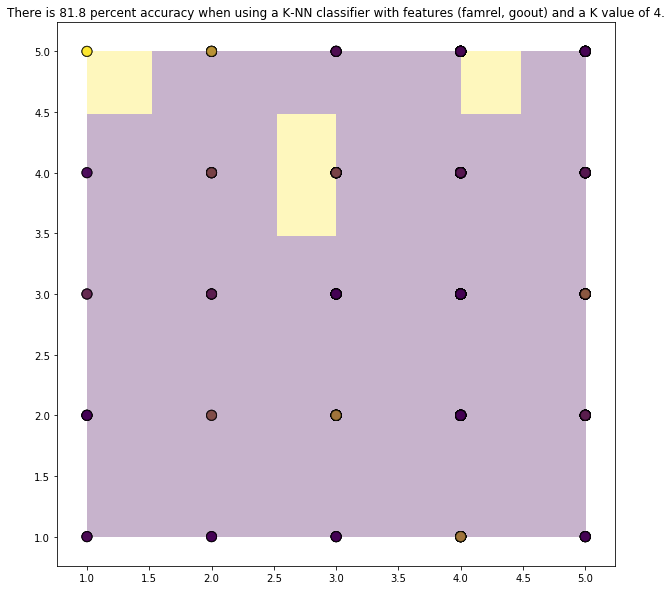

In [18]:
def do_knn():
    features = list(combinations(list(knn_data.columns), 2)) 
    for combination in features:
        knn_and_plot(combination[0], combination[1])
do_knn()